In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [75]:
iris = load_iris()
X = iris.data
y = iris.target

In [79]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris

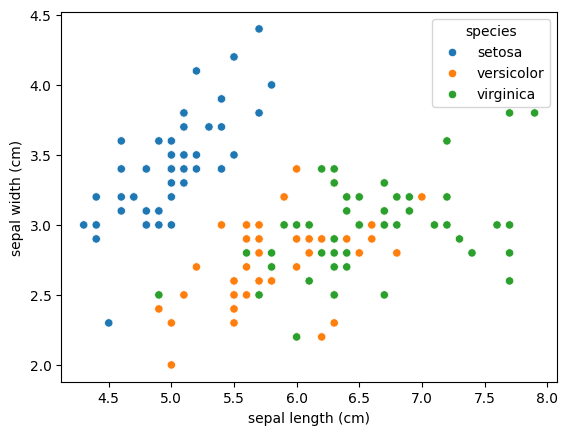

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# If you want species names instead of numbers
df['species'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Scatter plot
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['species'])
plt.show()


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [65]:
baseline_model = SVC(random_state=42)  # default params
baseline_model.fit(X_train, y_train)


SVC(random_state=42)

In [66]:
y_pred_baseline = baseline_model.predict(X_test)


In [67]:
baseline_acc = accuracy_score(y_test, y_pred_baseline)
print("Baseline SVM Accuracy:", baseline_acc)
print("Classification Report (Baseline):\n", classification_report(y_test, y_pred_baseline))


Baseline SVM Accuracy: 0.9666666666666667
Classification Report (Baseline):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_model = SVC(random_state=42)
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)

scaled_acc = accuracy_score(y_test, y_pred_scaled)
print("SVM with Scaling Accuracy:", scaled_acc)
print("Classification Report (Scaled):\n", classification_report(y_test, y_pred_scaled))


SVM with Scaling Accuracy: 0.9666666666666667
Classification Report (Scaled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [90]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

best_acc = accuracy_score(y_test, y_pred_best)
print("Best SVM after GridSearch Accuracy:", best_acc)
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Best Hyperparameters:", grid_search.best_params_)





Best SVM after GridSearch Accuracy: 0.9333333333333333
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [91]:
summary = pd.DataFrame({
    "Model": ["Baseline SVM", "SVM + Scaling", "SVM + Scaling + GridSearch"],
    "Test Accuracy": [baseline_acc, scaled_acc, best_acc]
})
print("\nComparison of Models:\n", summary)


Comparison of Models:
                         Model  Test Accuracy
0                Baseline SVM       0.966667
1               SVM + Scaling       0.966667
2  SVM + Scaling + GridSearch       0.933333
